In [9]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

$ H(x) = - \sum_x P(x) log_2 P(x) $

$ IM(x, y) = \sum_x \sum_y P(x, y) log_2 \frac{ P(x, y) }{ P(x)P(y) } $

In [36]:
def H(x):
    m = len(x)
    values, counts = np.unique(x, return_counts = True)
    nCategories = len(values)
    probabilities = counts/m
    h = -np.sum(probabilities*np.log2(probabilities))
    hMax = -np.log2(1/nCategories)
    return h, hMax
def IM(x, y):
    pass

In [37]:
print(H(df['municipio'].values))

(1.522370914986196, 3.4594316186372973)


In [39]:
df = pandas.read_csv('../Datasets/denue_inegi.csv', encoding='ISO-8859-1')

<AxesSubplot:xlabel='municipio', ylabel='count'>

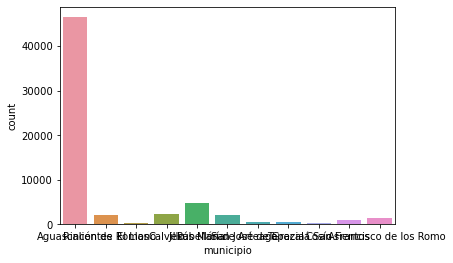

In [41]:
sns.countplot(data = df, x = 'municipio')

<AxesSubplot:xlabel='count', ylabel='municipio'>

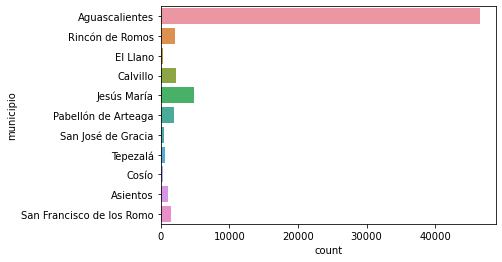

In [43]:
sns.countplot(data = df, y = 'municipio')

<AxesSubplot:xlabel='count', ylabel='municipio'>

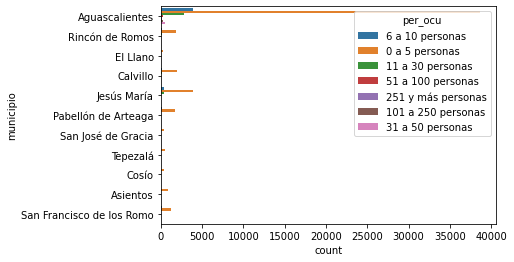

In [46]:
sns.countplot(data = df, y = 'municipio', hue = 'per_ocu')

<AxesSubplot:xlabel='count', ylabel='per_ocu'>

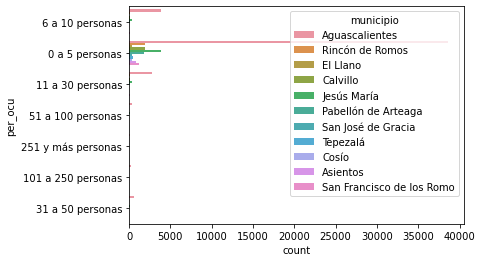

In [48]:
sns.countplot(data = df, hue = 'municipio', y = 'per_ocu')

## Filtros

In [52]:
iUno = df['nombre_act'].values == 'Escuelas de educación primaria del sector privado'
iDos = df['nombre_act'].values == 'Escuelas de educación primaria del sector público'
i = np.logical_or(iUno, iDos)

array([False, False, False, ..., False, False, False])

<AxesSubplot:xlabel='count'>

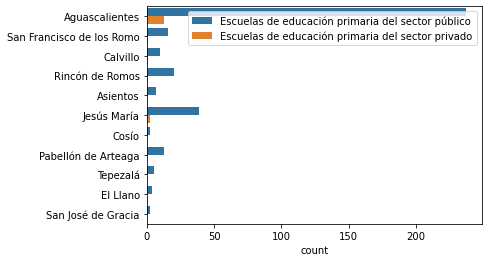

In [53]:
sns.countplot(y = df['municipio'].values[i], hue = df['nombre_act'].values[i])

([<matplotlib.patches.Wedge at 0x164310b2d30>,
 [Text(-0.30102937065636565, 1.0580081842794187, 'A'),
  Text(-0.4903120259502459, -0.9846797028519302, 'B'),
  Text(0.8129099456690837, -0.7410650580295144, 'C')])

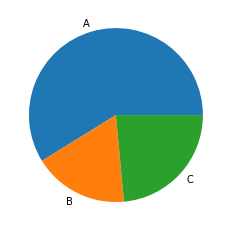

In [56]:
plt.figure()
plt.pie([10, 3, 4], labels = ['A', 'B', 'C'])


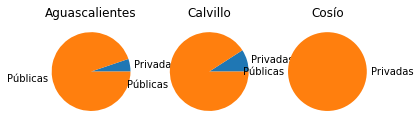

In [65]:
plt.figure()
plt.subplot(1, 3, 1)
plt.title('Aguascalientes')
iAgs = df['municipio'].values == 'Aguascalientes'
cUno = np.sum(np.logical_and(iUno, iAgs))
cDos = np.sum(np.logical_and(iDos, iAgs))
plt.pie([cUno, cDos], labels=['Privadas', 'Públicas'])
plt.subplot(1, 3, 2)
plt.title('Calvillo')
iCal = df['municipio'].values == 'Calvillo'
cUno = np.sum(np.logical_and(iUno, iCal))
cDos = np.sum(np.logical_and(iDos, iCal))
plt.pie([cUno, cDos], labels=['Privadas', 'Públicas'])
plt.subplot(1, 3, 3)
plt.title('Cosío')
iCos = df['municipio'].values == 'Cosío'
cUno = np.sum(np.logical_and(iUno, iCos))
cDos = np.sum(np.logical_and(iDos, iCos))
plt.pie([cUno, cDos], labels=['Privadas', 'Públicas'])
plt.show()